#### 조건부독립

In [1]:
np.random.seed(0)
C = np.random.normal(100, 15, 2000)
A = C + np.random.normal(0, 5, 2000)
B = C + np.random.normal(0, 5, 2000)

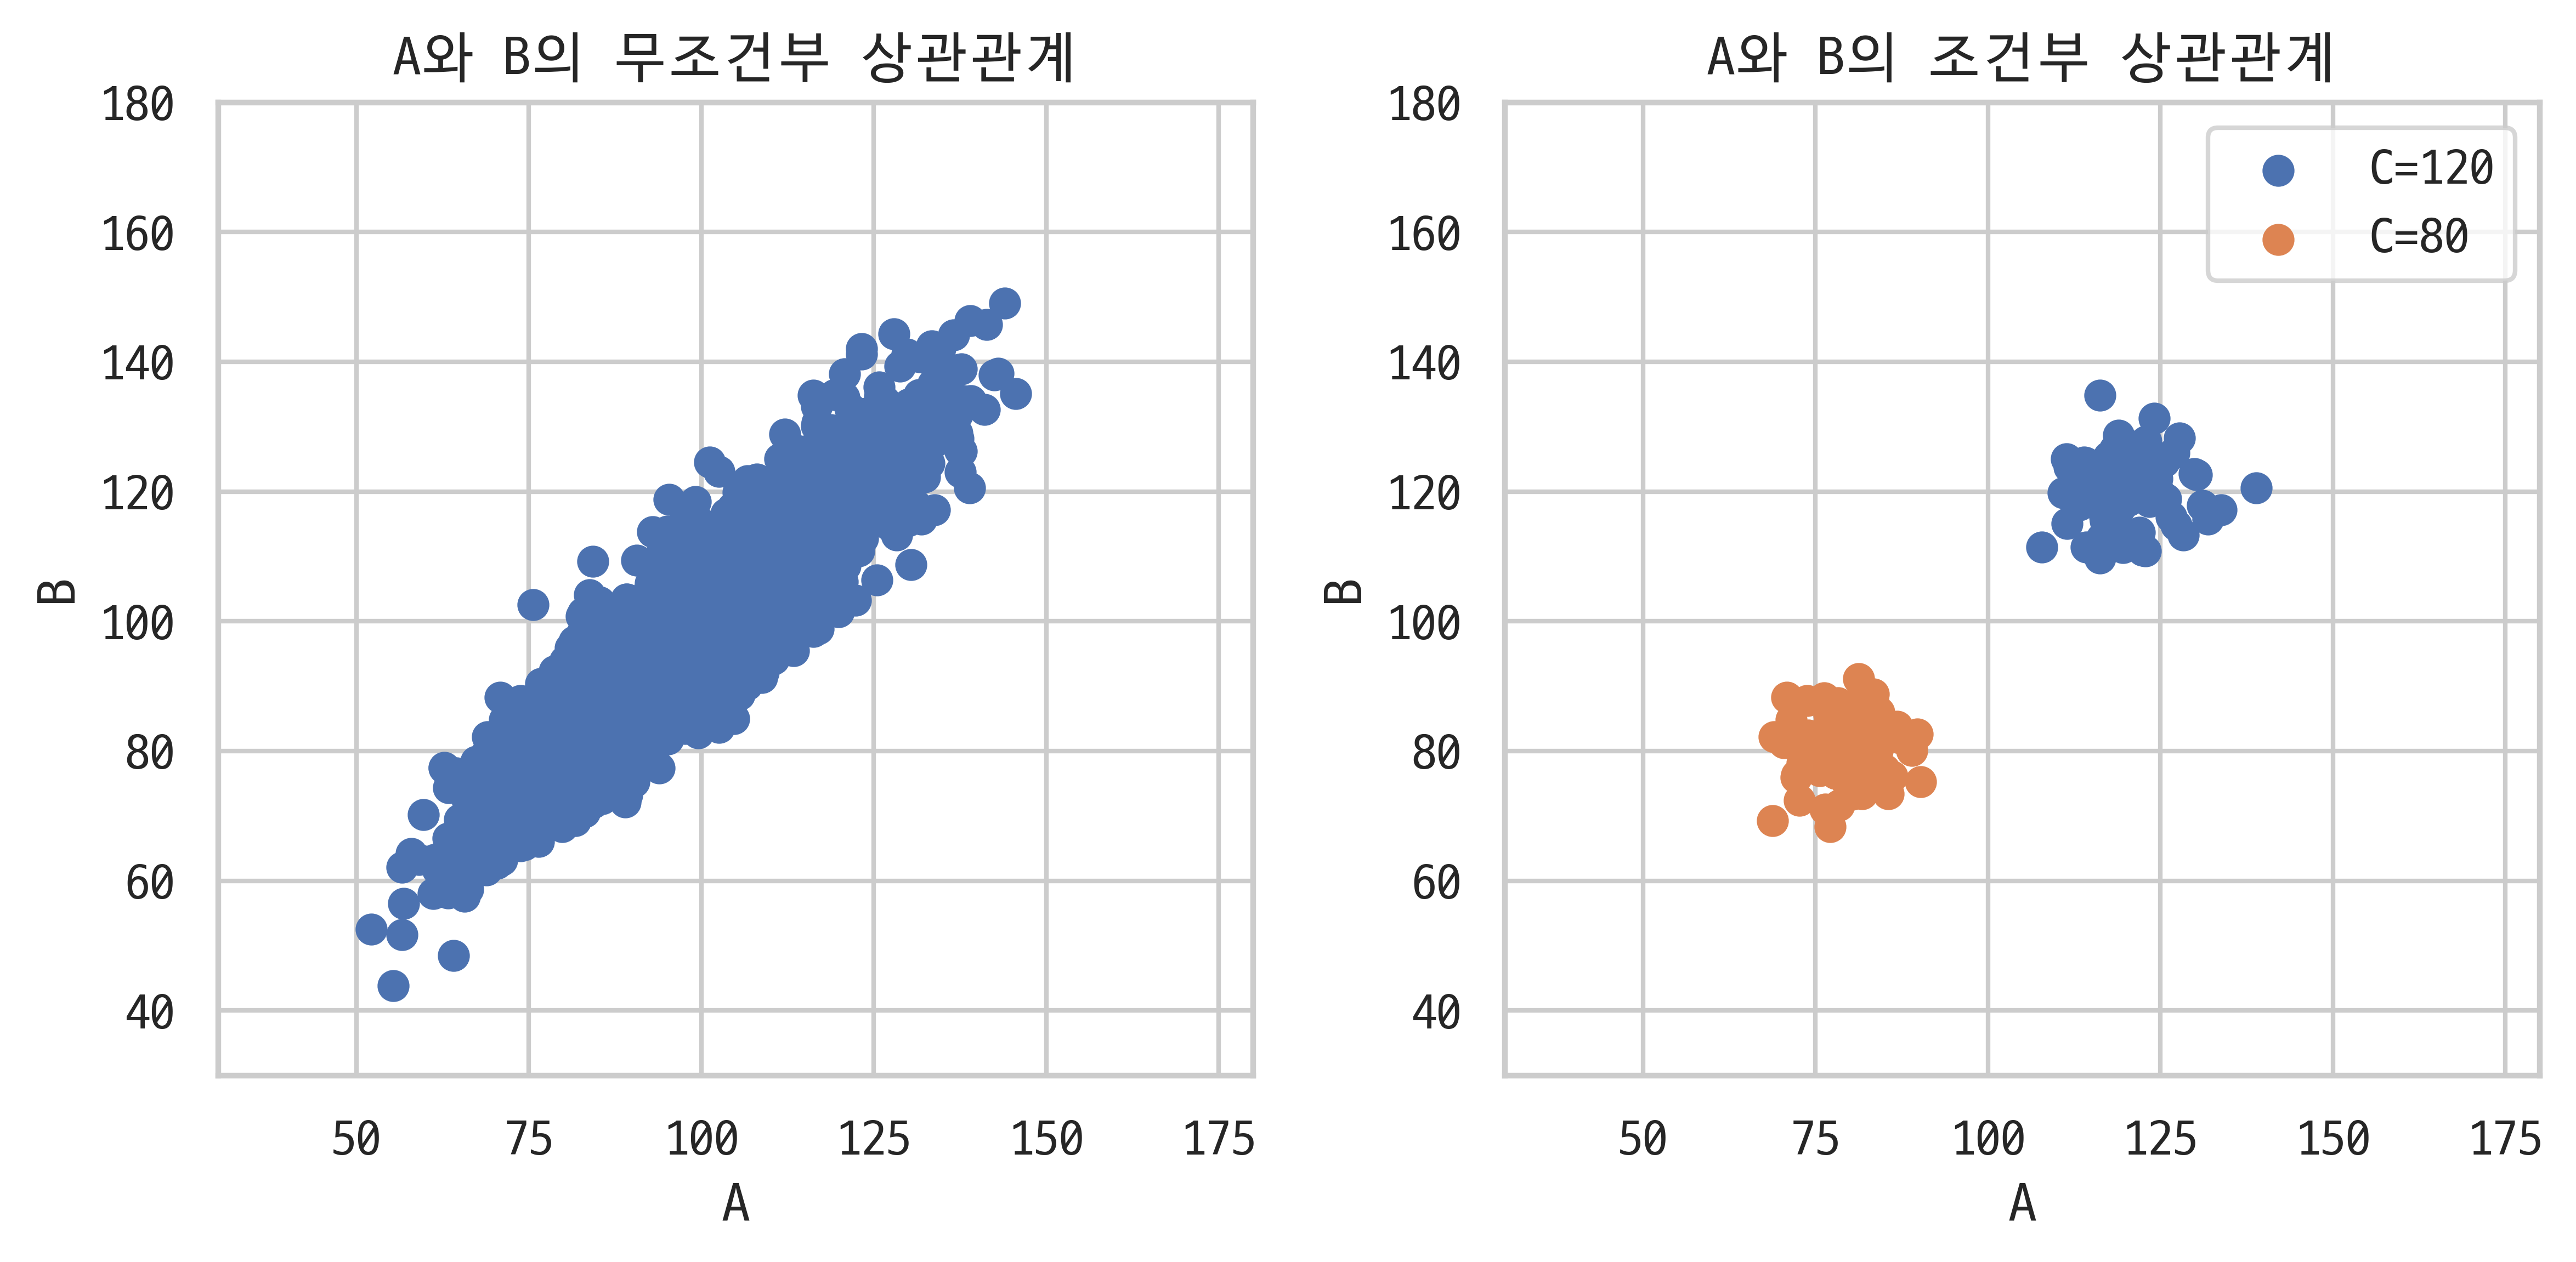

In [2]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.scatter(A, B)
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.title('A와 B의 무조건부 상관관계')

plt.subplot(122)
idx1 = (118 < C) & (C < 122)
idx2 = (78 < C) & (C < 82)
plt.scatter(A[idx1], B[idx1], label='C=120')
plt.scatter(A[idx2], B[idx2], label='C=80')
plt.xlabel('A')
plt.ylabel('B')
plt.xlim(30, 180)
plt.ylim(30, 180)
plt.legend()
plt.title('A와 B의 조건부 상관관계')

plt.tight_layout()
plt.show()

#### 정규분포 나이브베이즈 모형

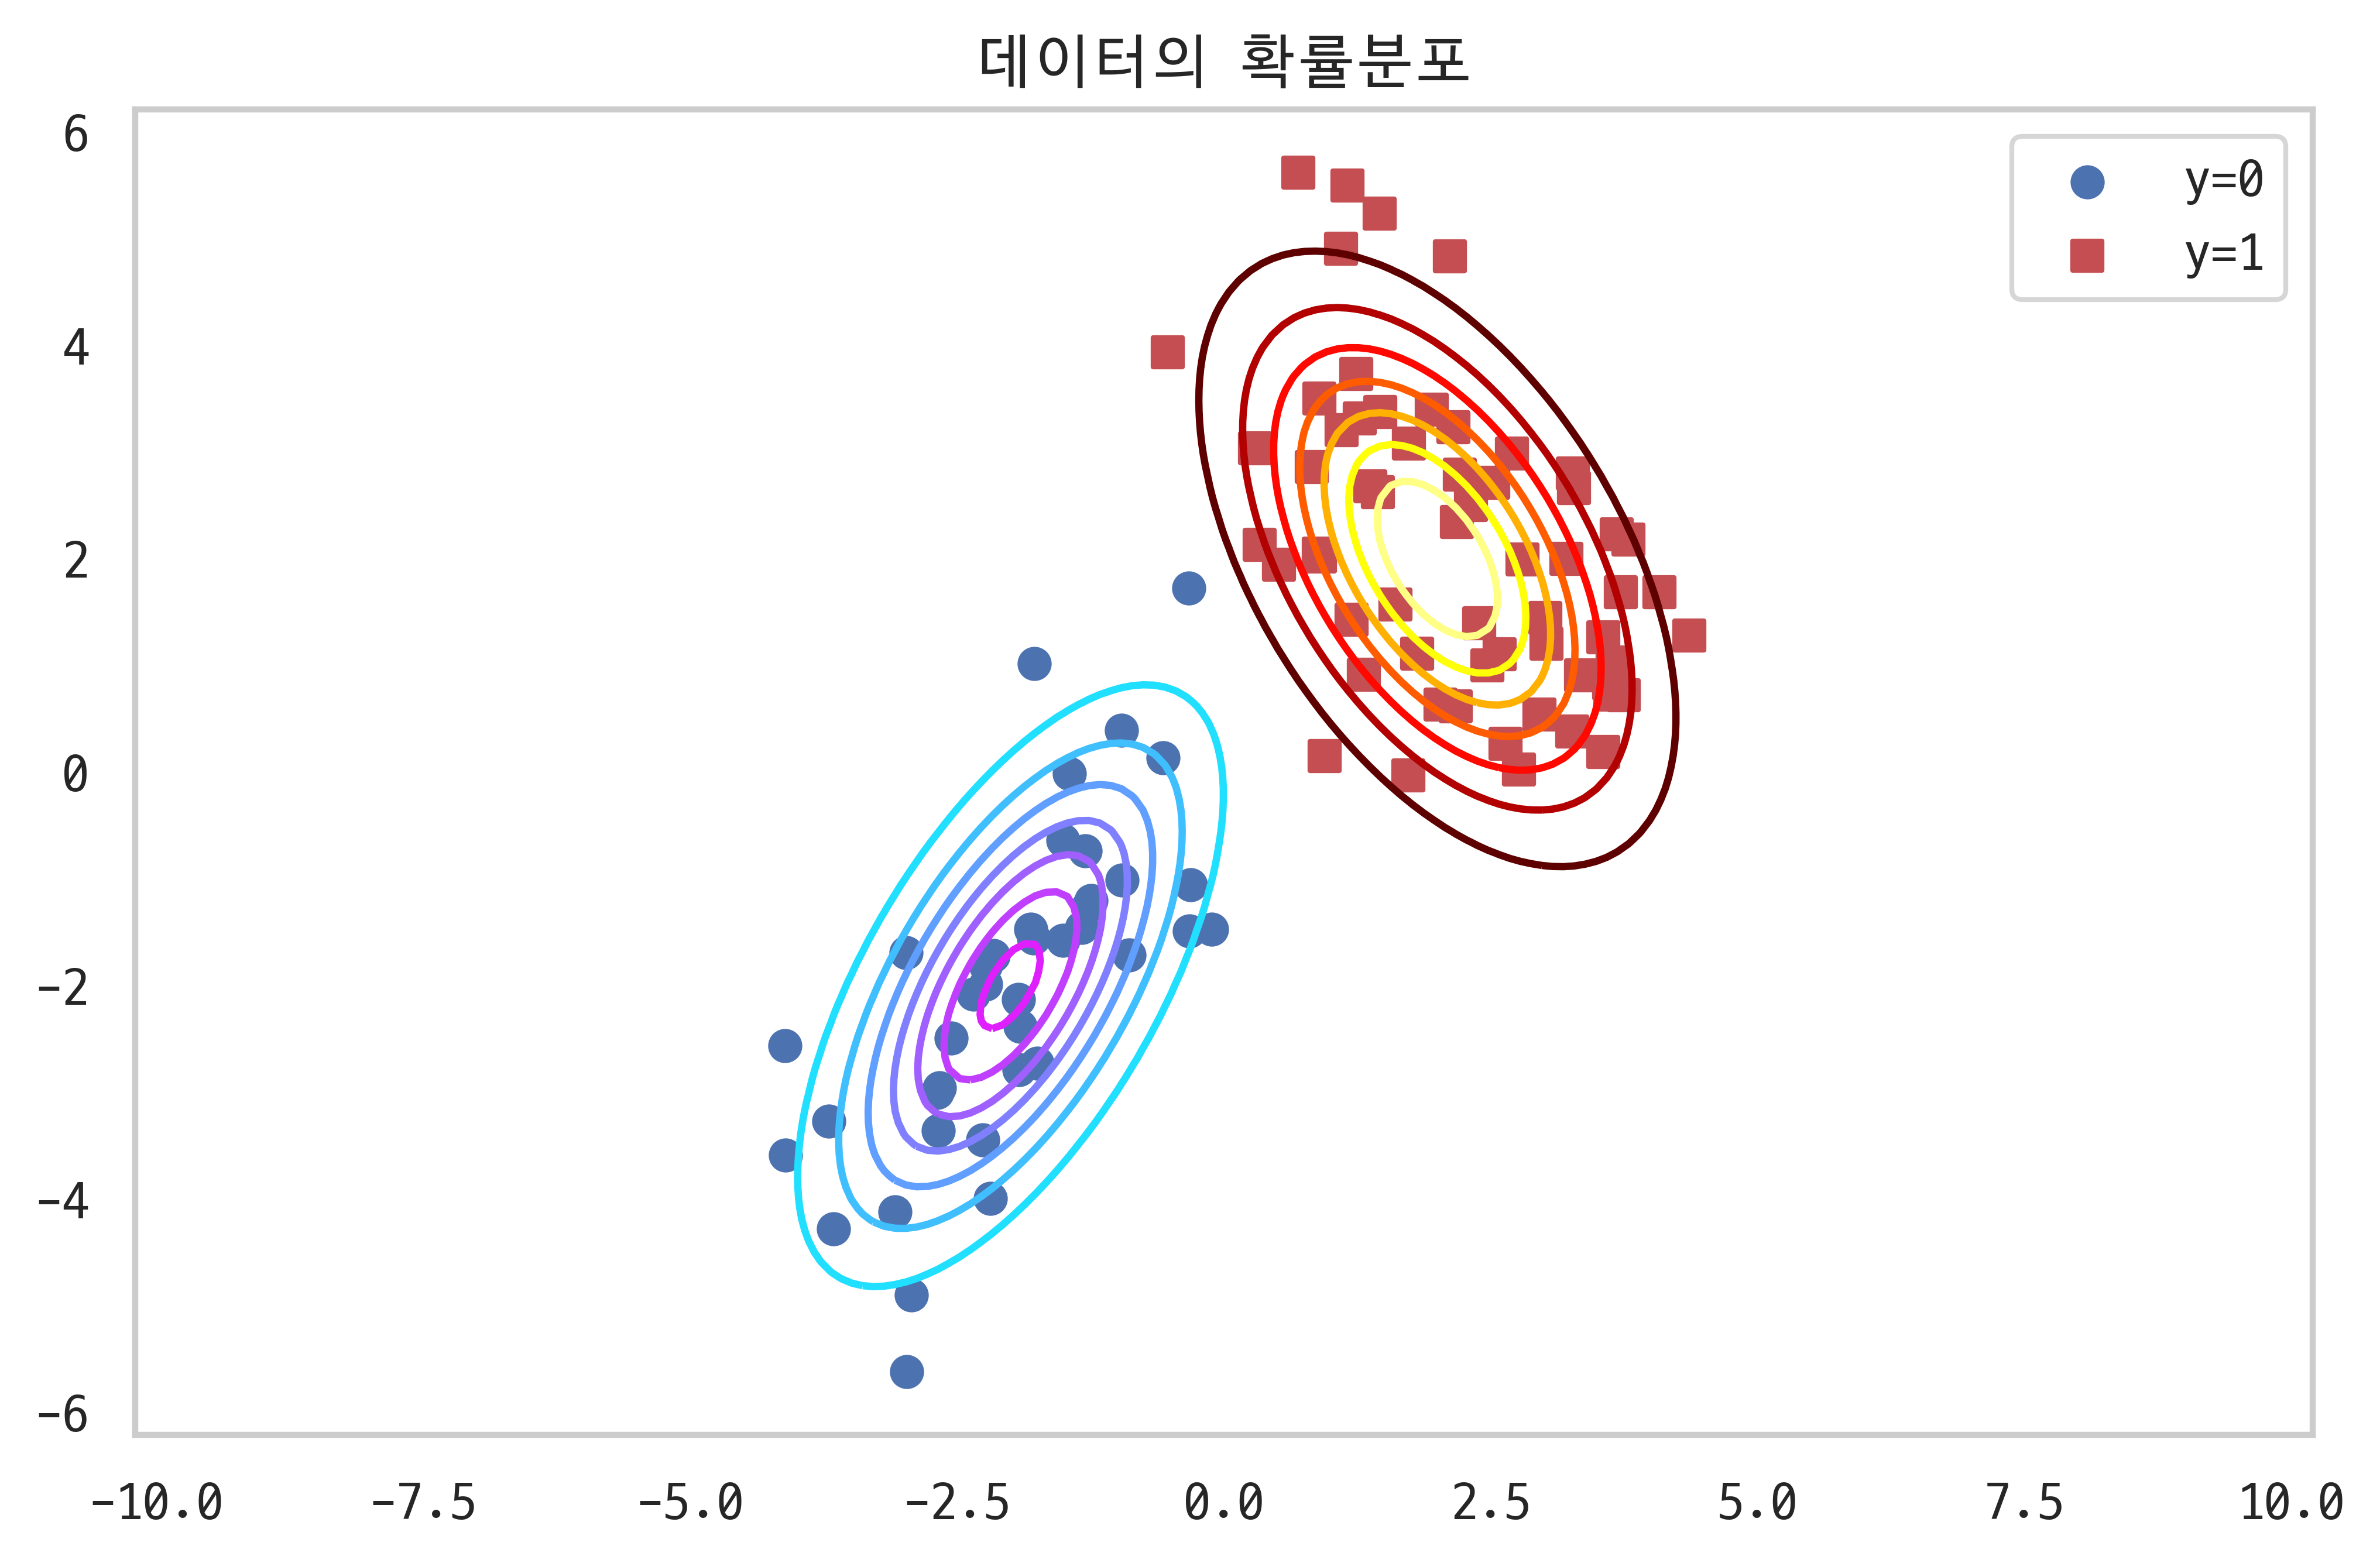

In [12]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='b', label='y=0')
plt.scatter(X1[:, 0], X1[:, 1], marker='s', c='r', label='y=1')
plt.legend()
plt.axis('equal')
plt.title('데이터의 확률분포')
plt.show()

In [13]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [14]:
model_norm.classes_

array([0., 1.])

In [15]:
model_norm.class_count_

array([40., 60.])

In [16]:
model_norm.class_prior_

array([0.4, 0.6])

In [19]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [20]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

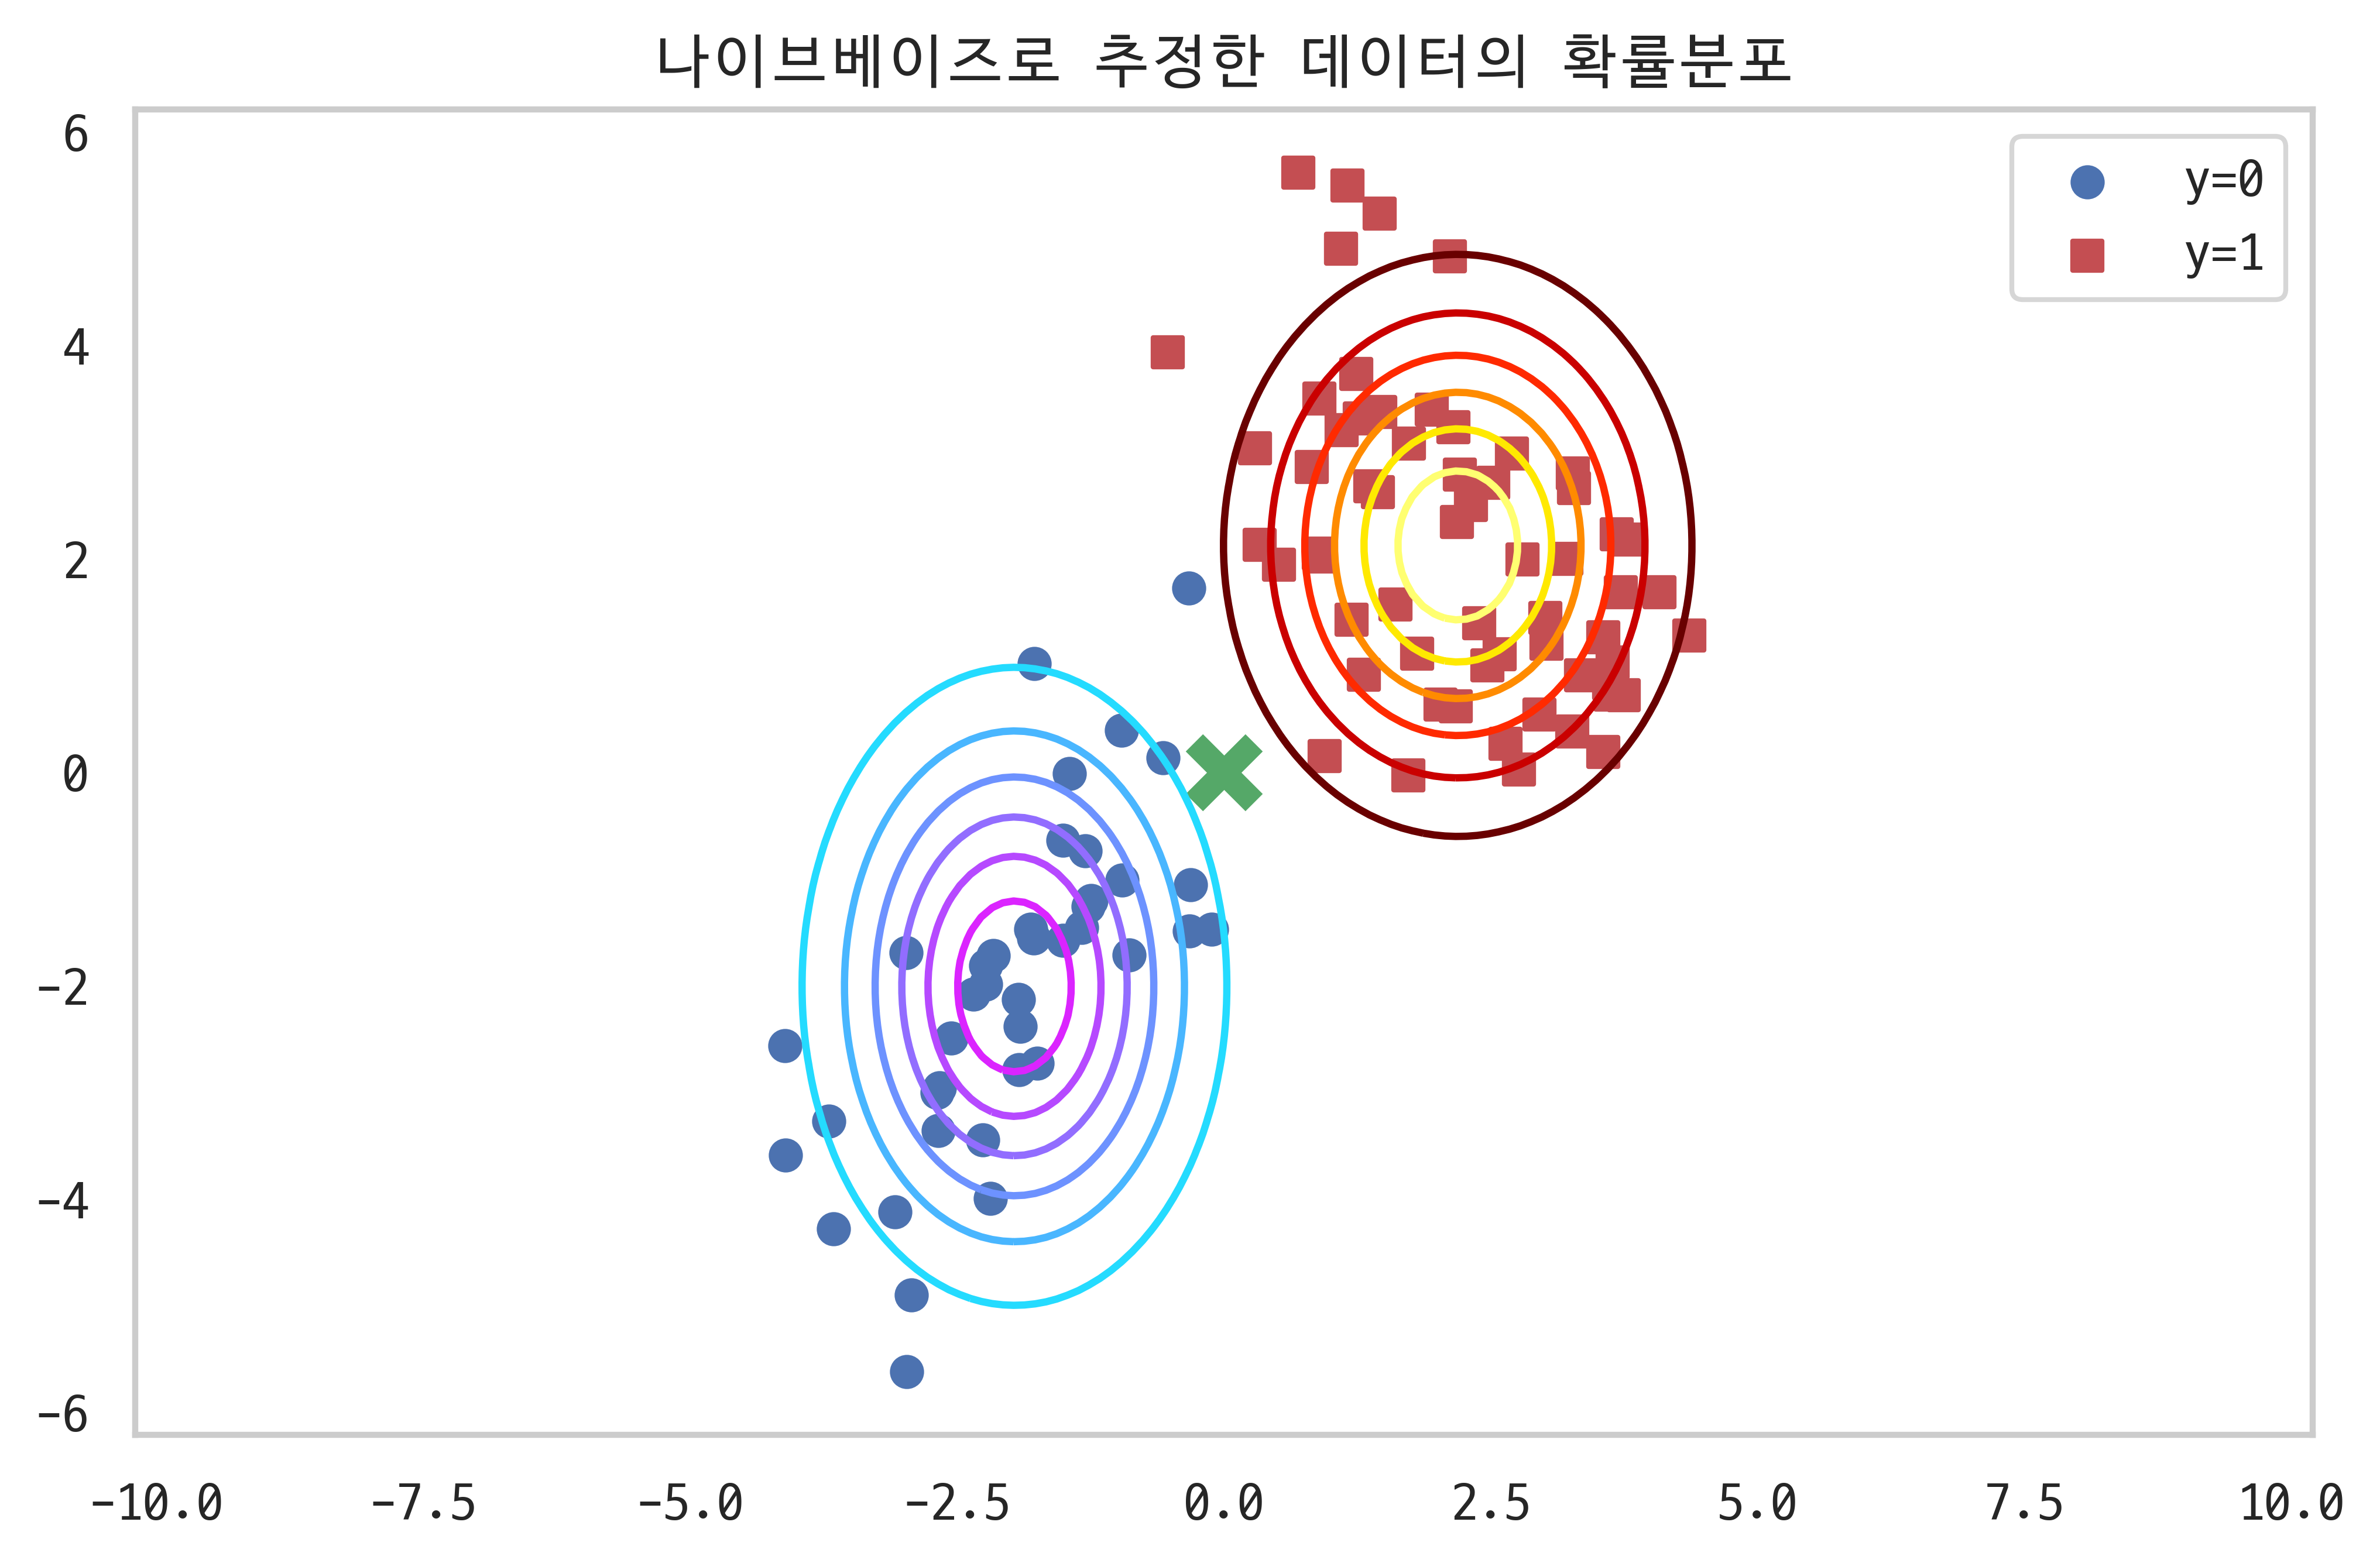

In [21]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker='o', c='b', label='y=0')
plt.scatter(X1[:, 0], X1[:, 1], marker='s', c='r', label='y=1')

x_new = [0, 0]
plt.scatter(x_new[0], x_new[1], c='g', marker='x', s=150, lw=5)
plt.legend()
plt.axis('equal')
plt.title('나이브베이즈로 추정한 데이터의 확률분포')
plt.show()

In [22]:
model_norm.predict_proba([x_new])

array([[0.48475244, 0.51524756]])

In [24]:
likelihood = [
    (sp.stats.norm(model_norm.theta_[0][0], np.sqrt(model_norm.sigma_[0][0])).pdf(x_new[0]) * 
     sp.stats.norm(model_norm.theta_[0][1], np.sqrt(model_norm.sigma_[0][1])).pdf(x_new[1])),
    (sp.stats.norm(model_norm.theta_[1][0], np.sqrt(model_norm.sigma_[1][0])).pdf(x_new[0]) * 
     sp.stats.norm(model_norm.theta_[1][1], np.sqrt(model_norm.sigma_[1][1])).pdf(x_new[1])),
]
likelihood

[0.006615760017637298, 0.00468796559514829]

In [25]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.0026463 , 0.00281278])

In [26]:
posterior / posterior.sum()

array([0.48475244, 0.51524756])

#### Ex.13.2.1

In [69]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
model = GaussianNB().fit(X, y)
y_pred = model.predict(X)

In [70]:
# 1 : 각각의 종이 선택될 사전확률
model.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [71]:
# 2 : 각각의 종에 대해 꽃받침의 길이, 꽃받침의 폭, 꽃잎의 길이, 꽃잎의 폭의 평균과 분산
df = pd.DataFrame(np.vstack([model.theta_, model.sigma_]), columns=iris.feature_names, 
                  index=np.vstack([iris.target_names, iris.target_names]).flatten())
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.006000,3.428000,1.462000,0.246000
versicolor,5.936000,2.770000,4.260000,1.326000
virginica,6.588000,2.974000,5.552000,2.026000
setosa,0.121764,0.140816,0.029556,0.010884
versicolor,0.261104,0.096500,0.216400,0.038324
virginica,0.396256,0.101924,0.298496,0.073924


In [72]:
# 3 : 분류결과표, 분류보고서, ROC, AUC 계산
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



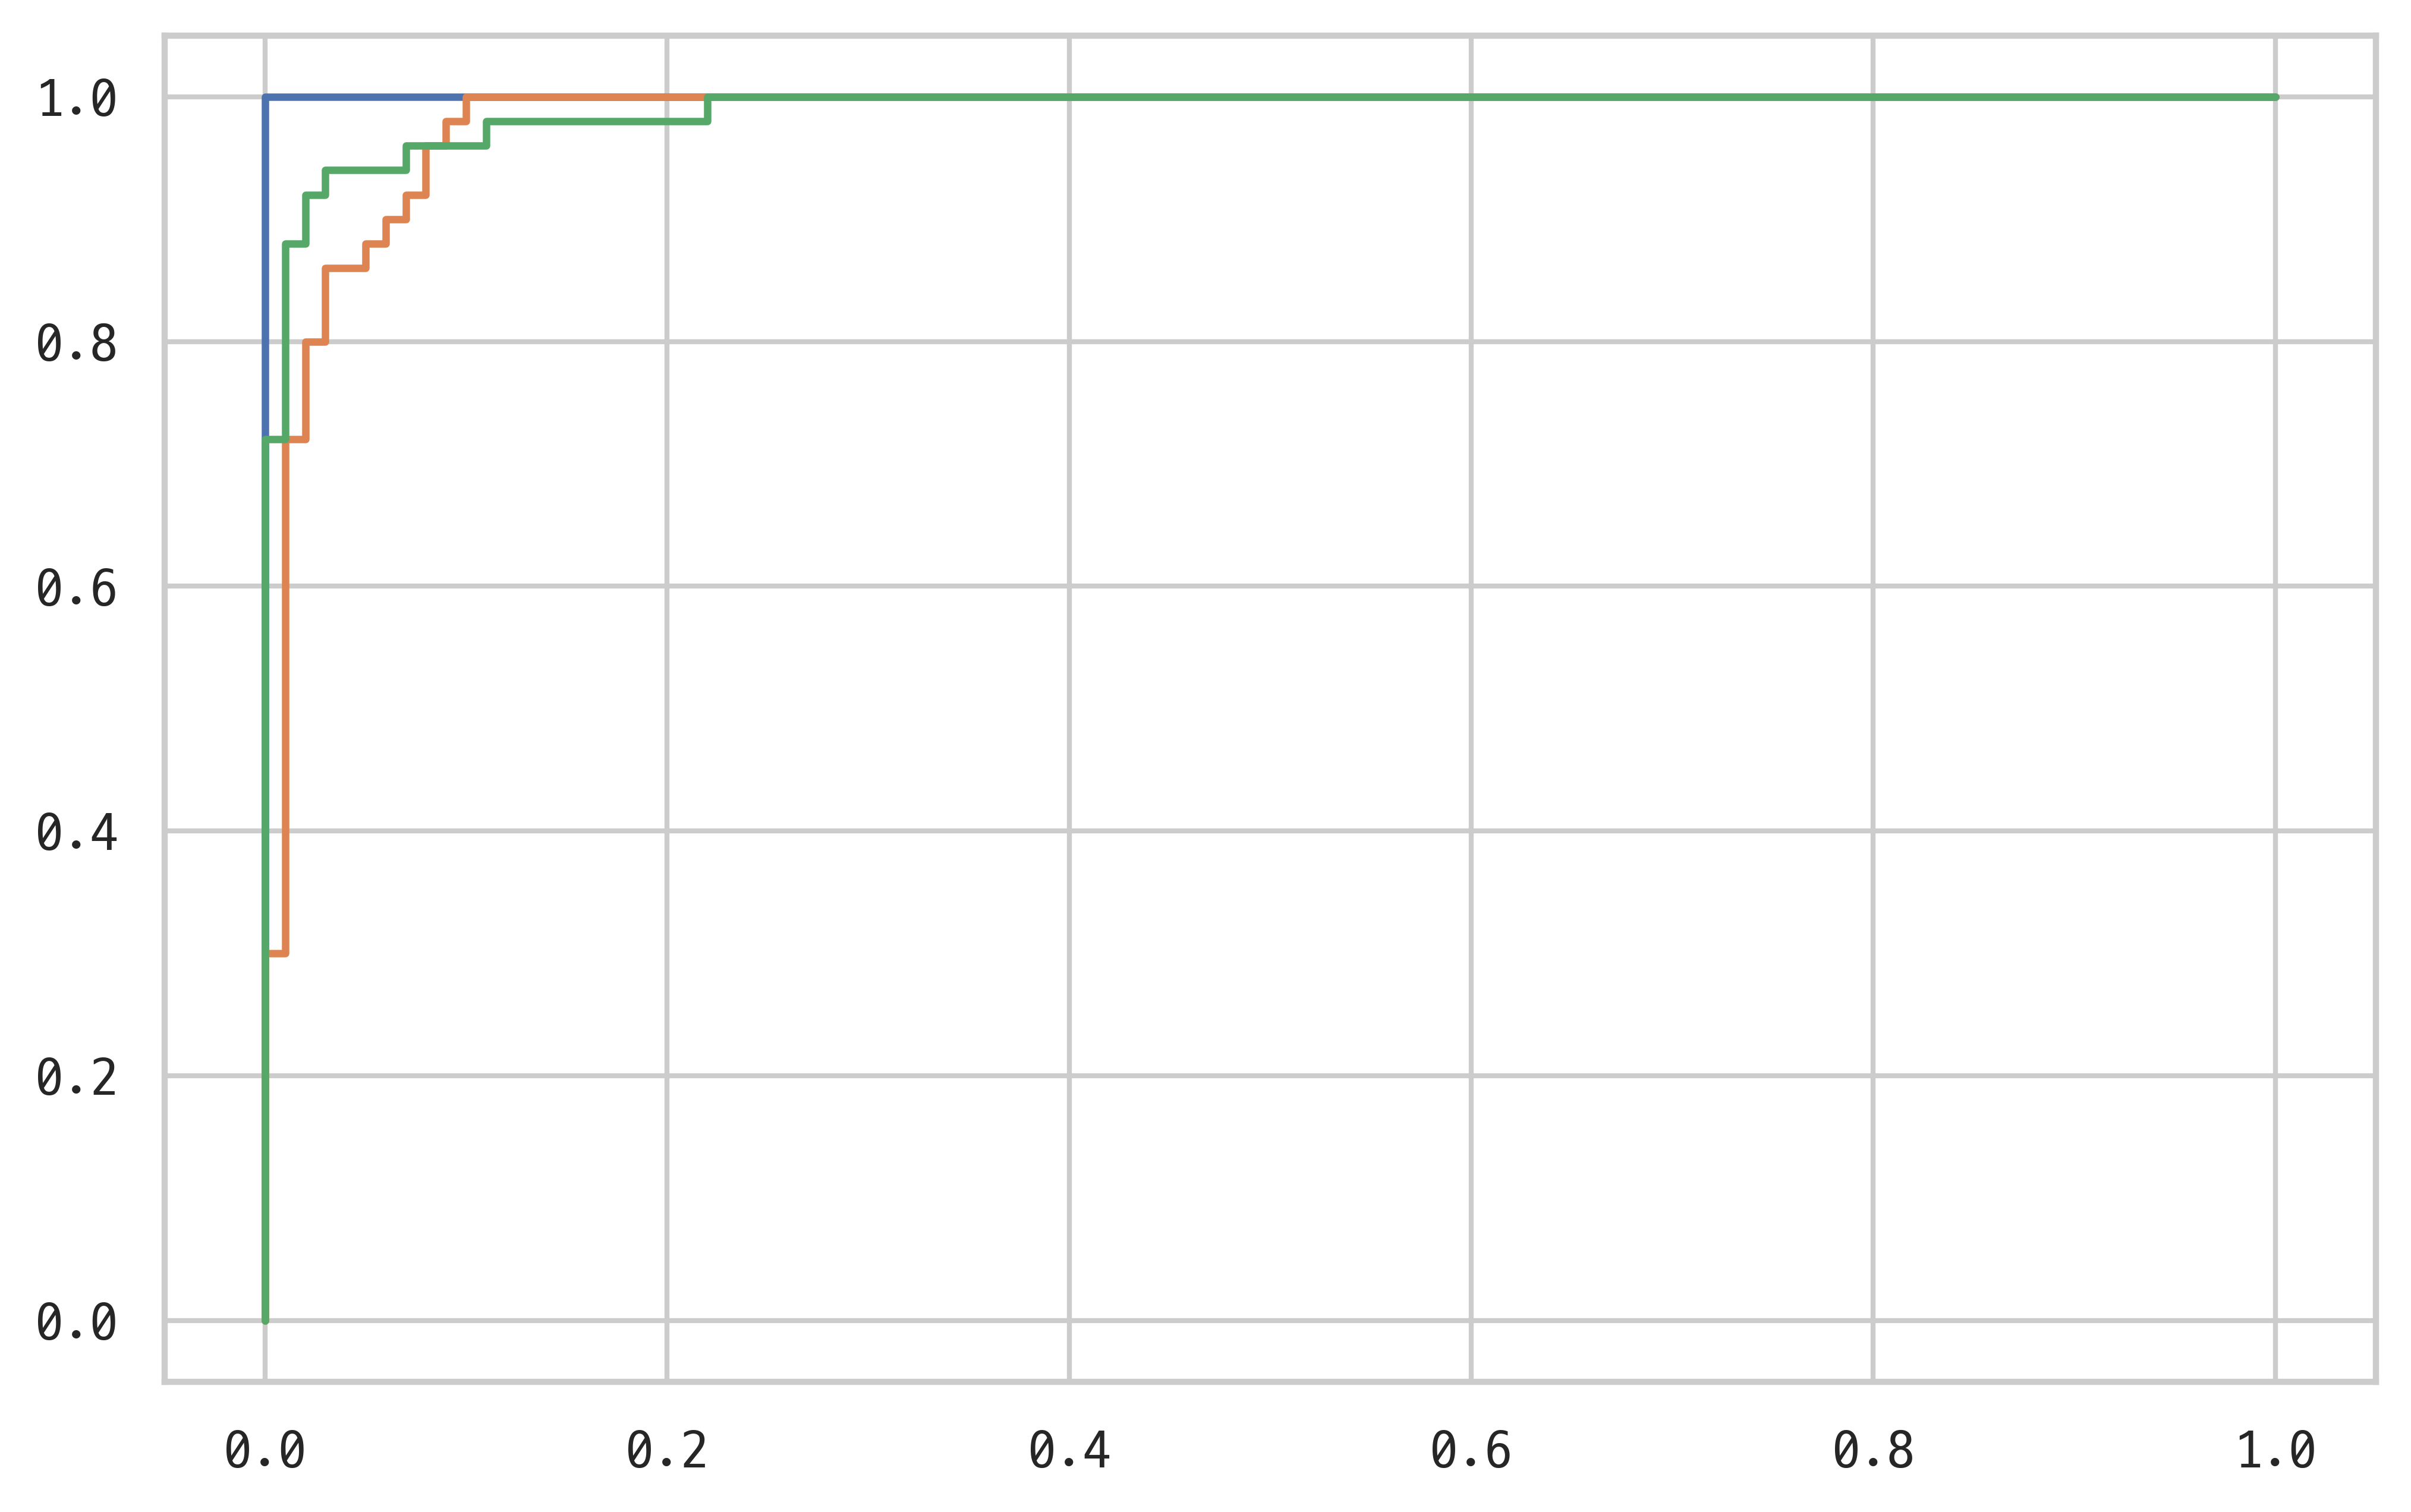

In [77]:
from sklearn.preprocessing import label_binarize

y_vec = label_binarize(y, [0, 1, 2])

from sklearn.metrics import roc_curve

for i in range(3):
    model = GaussianNB().fit(X, y_vec[:, i])
    fpr, tpr, thr = roc_curve(y_vec[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr, tpr, label=iris.target_names[i])

plt.show()

In [78]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.989

#### 베르누이분포 나이브베이즈 모형

In [80]:
X = np.array([
    [0, 1, 1, 0],
    [1, 1, 1, 1],
    [1, 1, 1, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 1],
    [0, 1, 1, 0],
    [0, 1, 1, 1],
    [1, 0, 1, 0],
    [1, 0, 1, 1],
    [0, 1, 1, 0]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [81]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [82]:
model_bern.classes_

array([0, 1])

In [83]:
model_bern.class_count_

array([4., 6.])

In [84]:
model_bern.class_log_prior_

array([-0.91629073, -0.51082562])

In [86]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [87]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

In [89]:
model_bern.alpha

1.0

In [90]:
# 스무딩 적용 : 1/2 쪽으로 움직임
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

In [92]:
x_new = np.array([0, 1, 1, 1])
model_bern.predict_proba([x_new])

array([[0.34501348, 0.65498652]])

In [94]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1) * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.34501348, 0.65498652])

In [96]:
x_new = np.array([0, 0, 1, 1])
model_bern.predict_proba([x_new])

array([[0.09530901, 0.90469099]])

In [97]:
p = ((theta ** x_new) * (1 - theta) ** (1 - x_new)).prod(axis=1) * np.exp(model_bern.class_log_prior_)
p / p.sum()

array([0.09530901, 0.90469099])

#### Ex. 13.2.2

In [129]:
# 1
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.preprocessing import Binarizer
X = Binarizer(7).fit_transform(X)

In [130]:
X[0, :].reshape((8, 8))

array([[0., 0., 0., 1., 1., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 0.]])

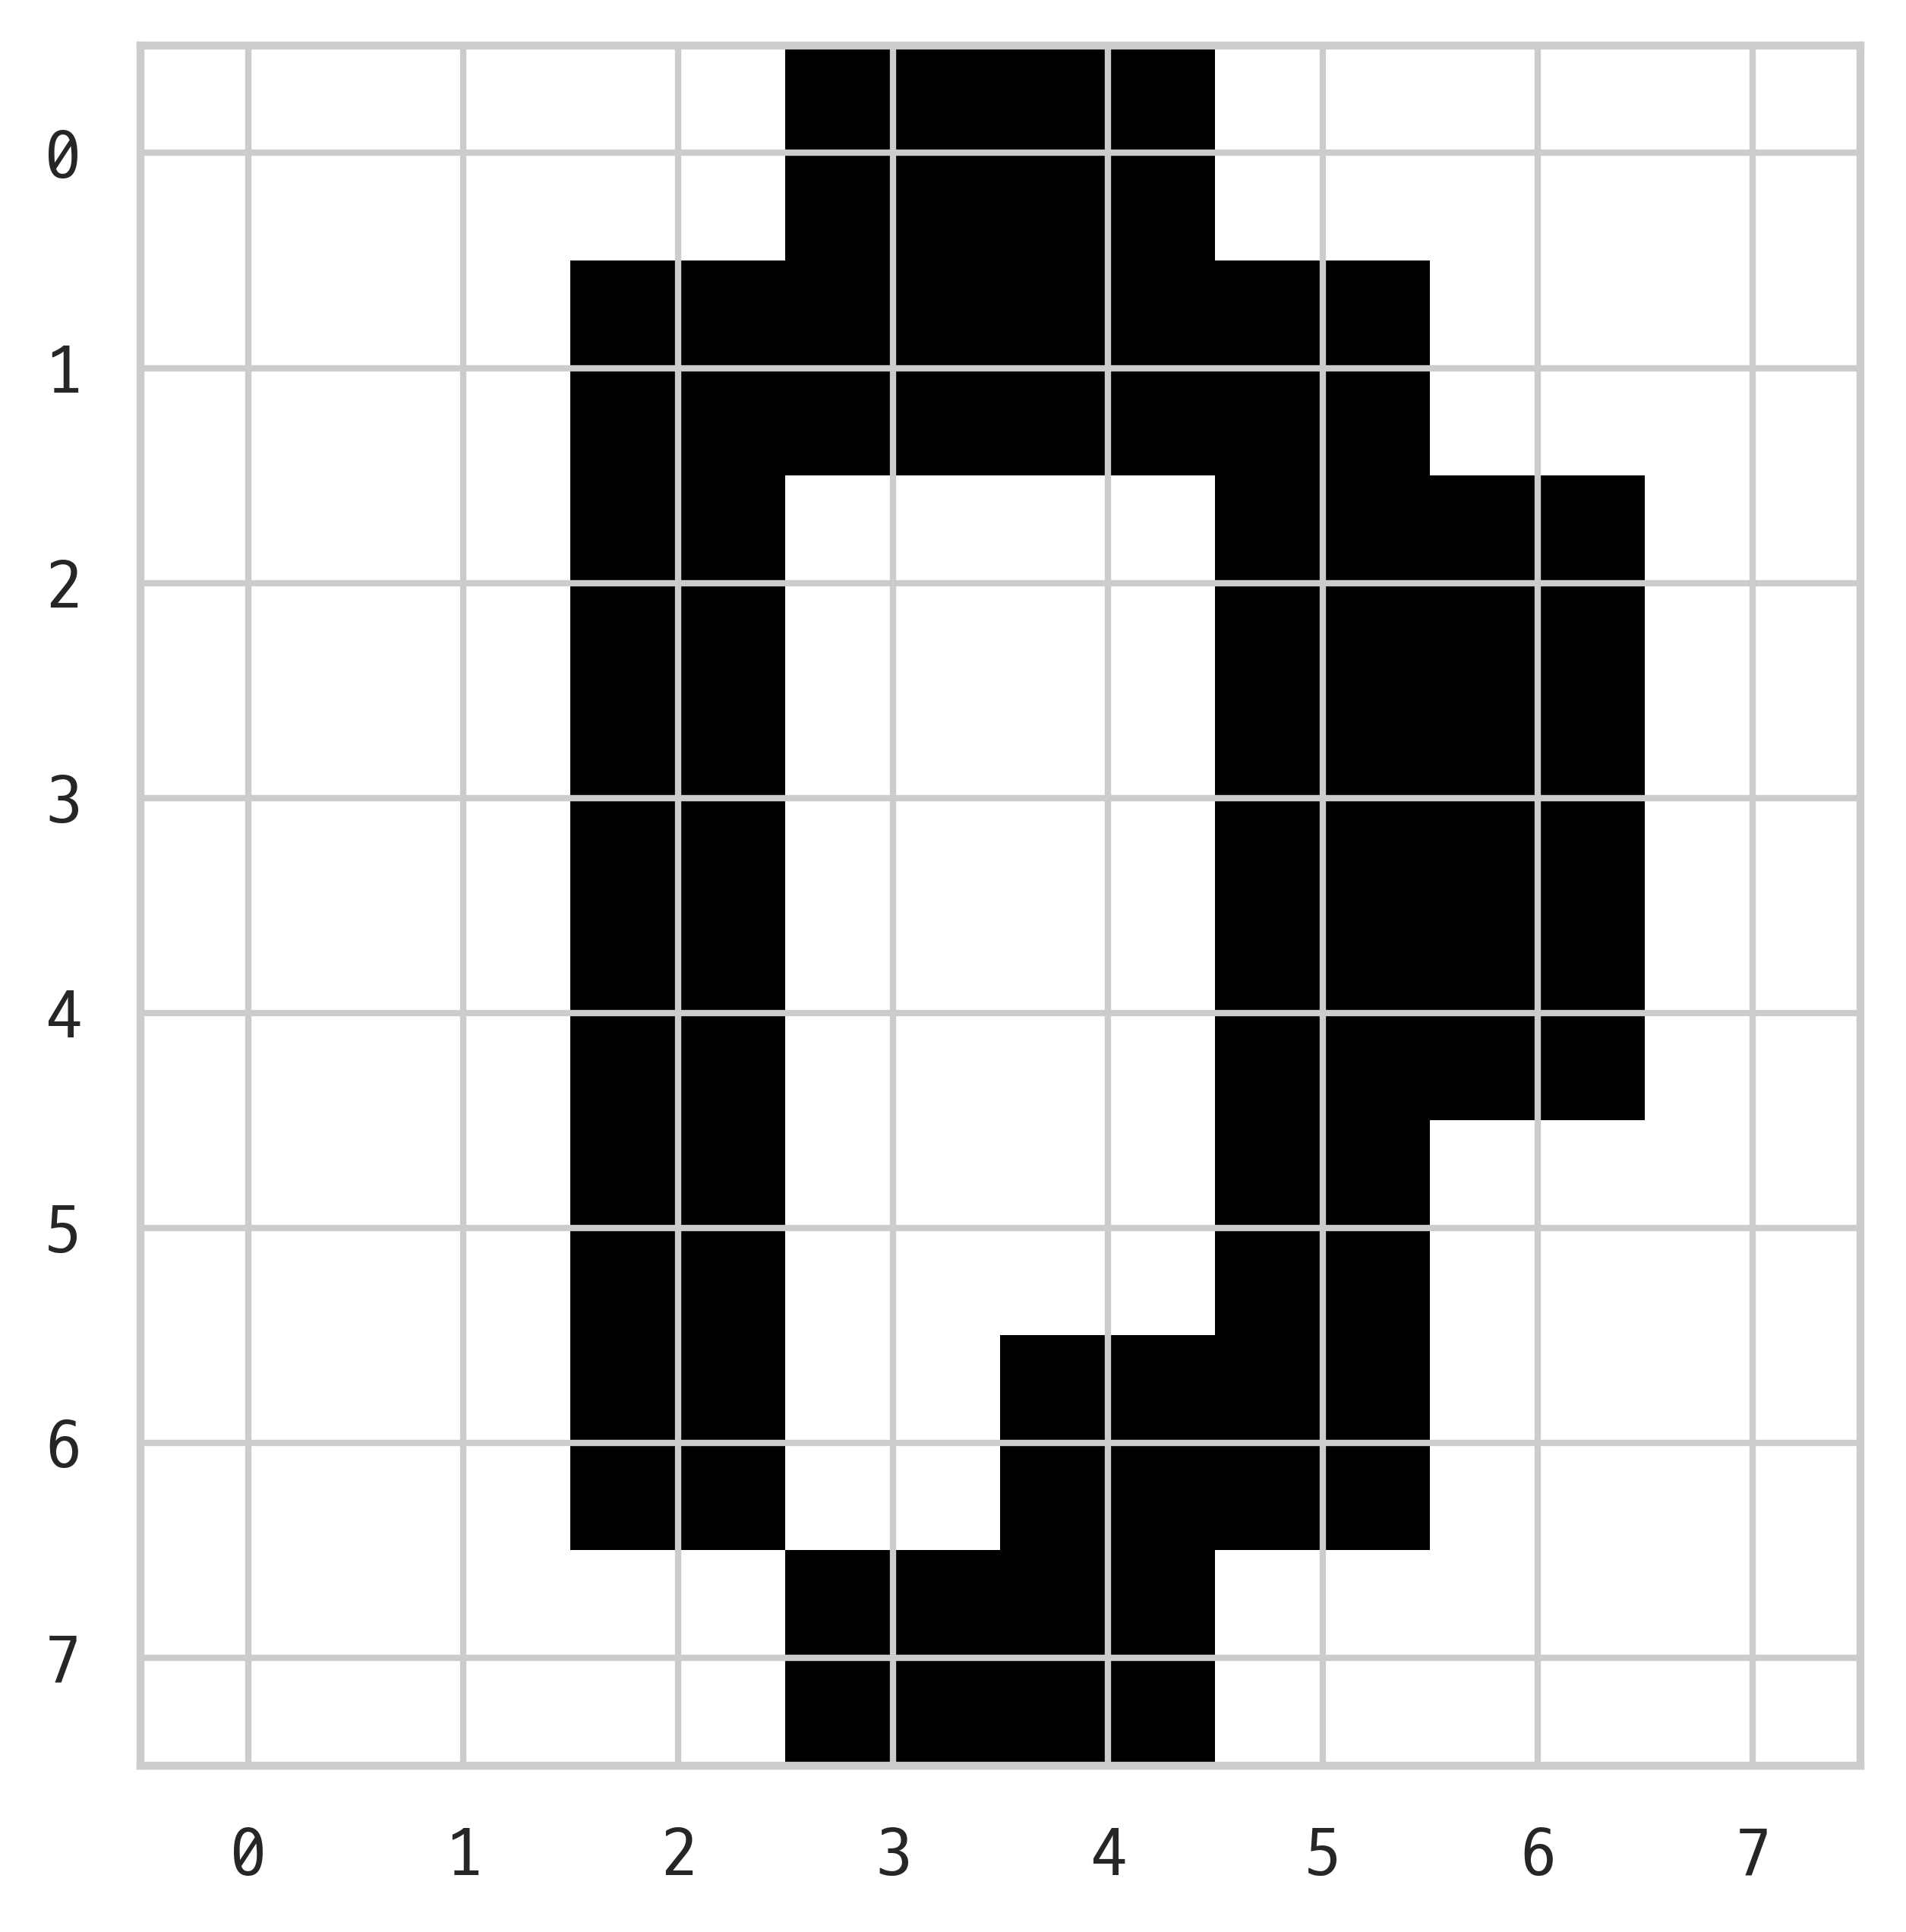

In [131]:
plt.imshow(X[0, :].reshape((8, 8)), cmap=plt.cm.binary)

In [132]:
model = BernoulliNB().fit(X, y)
y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



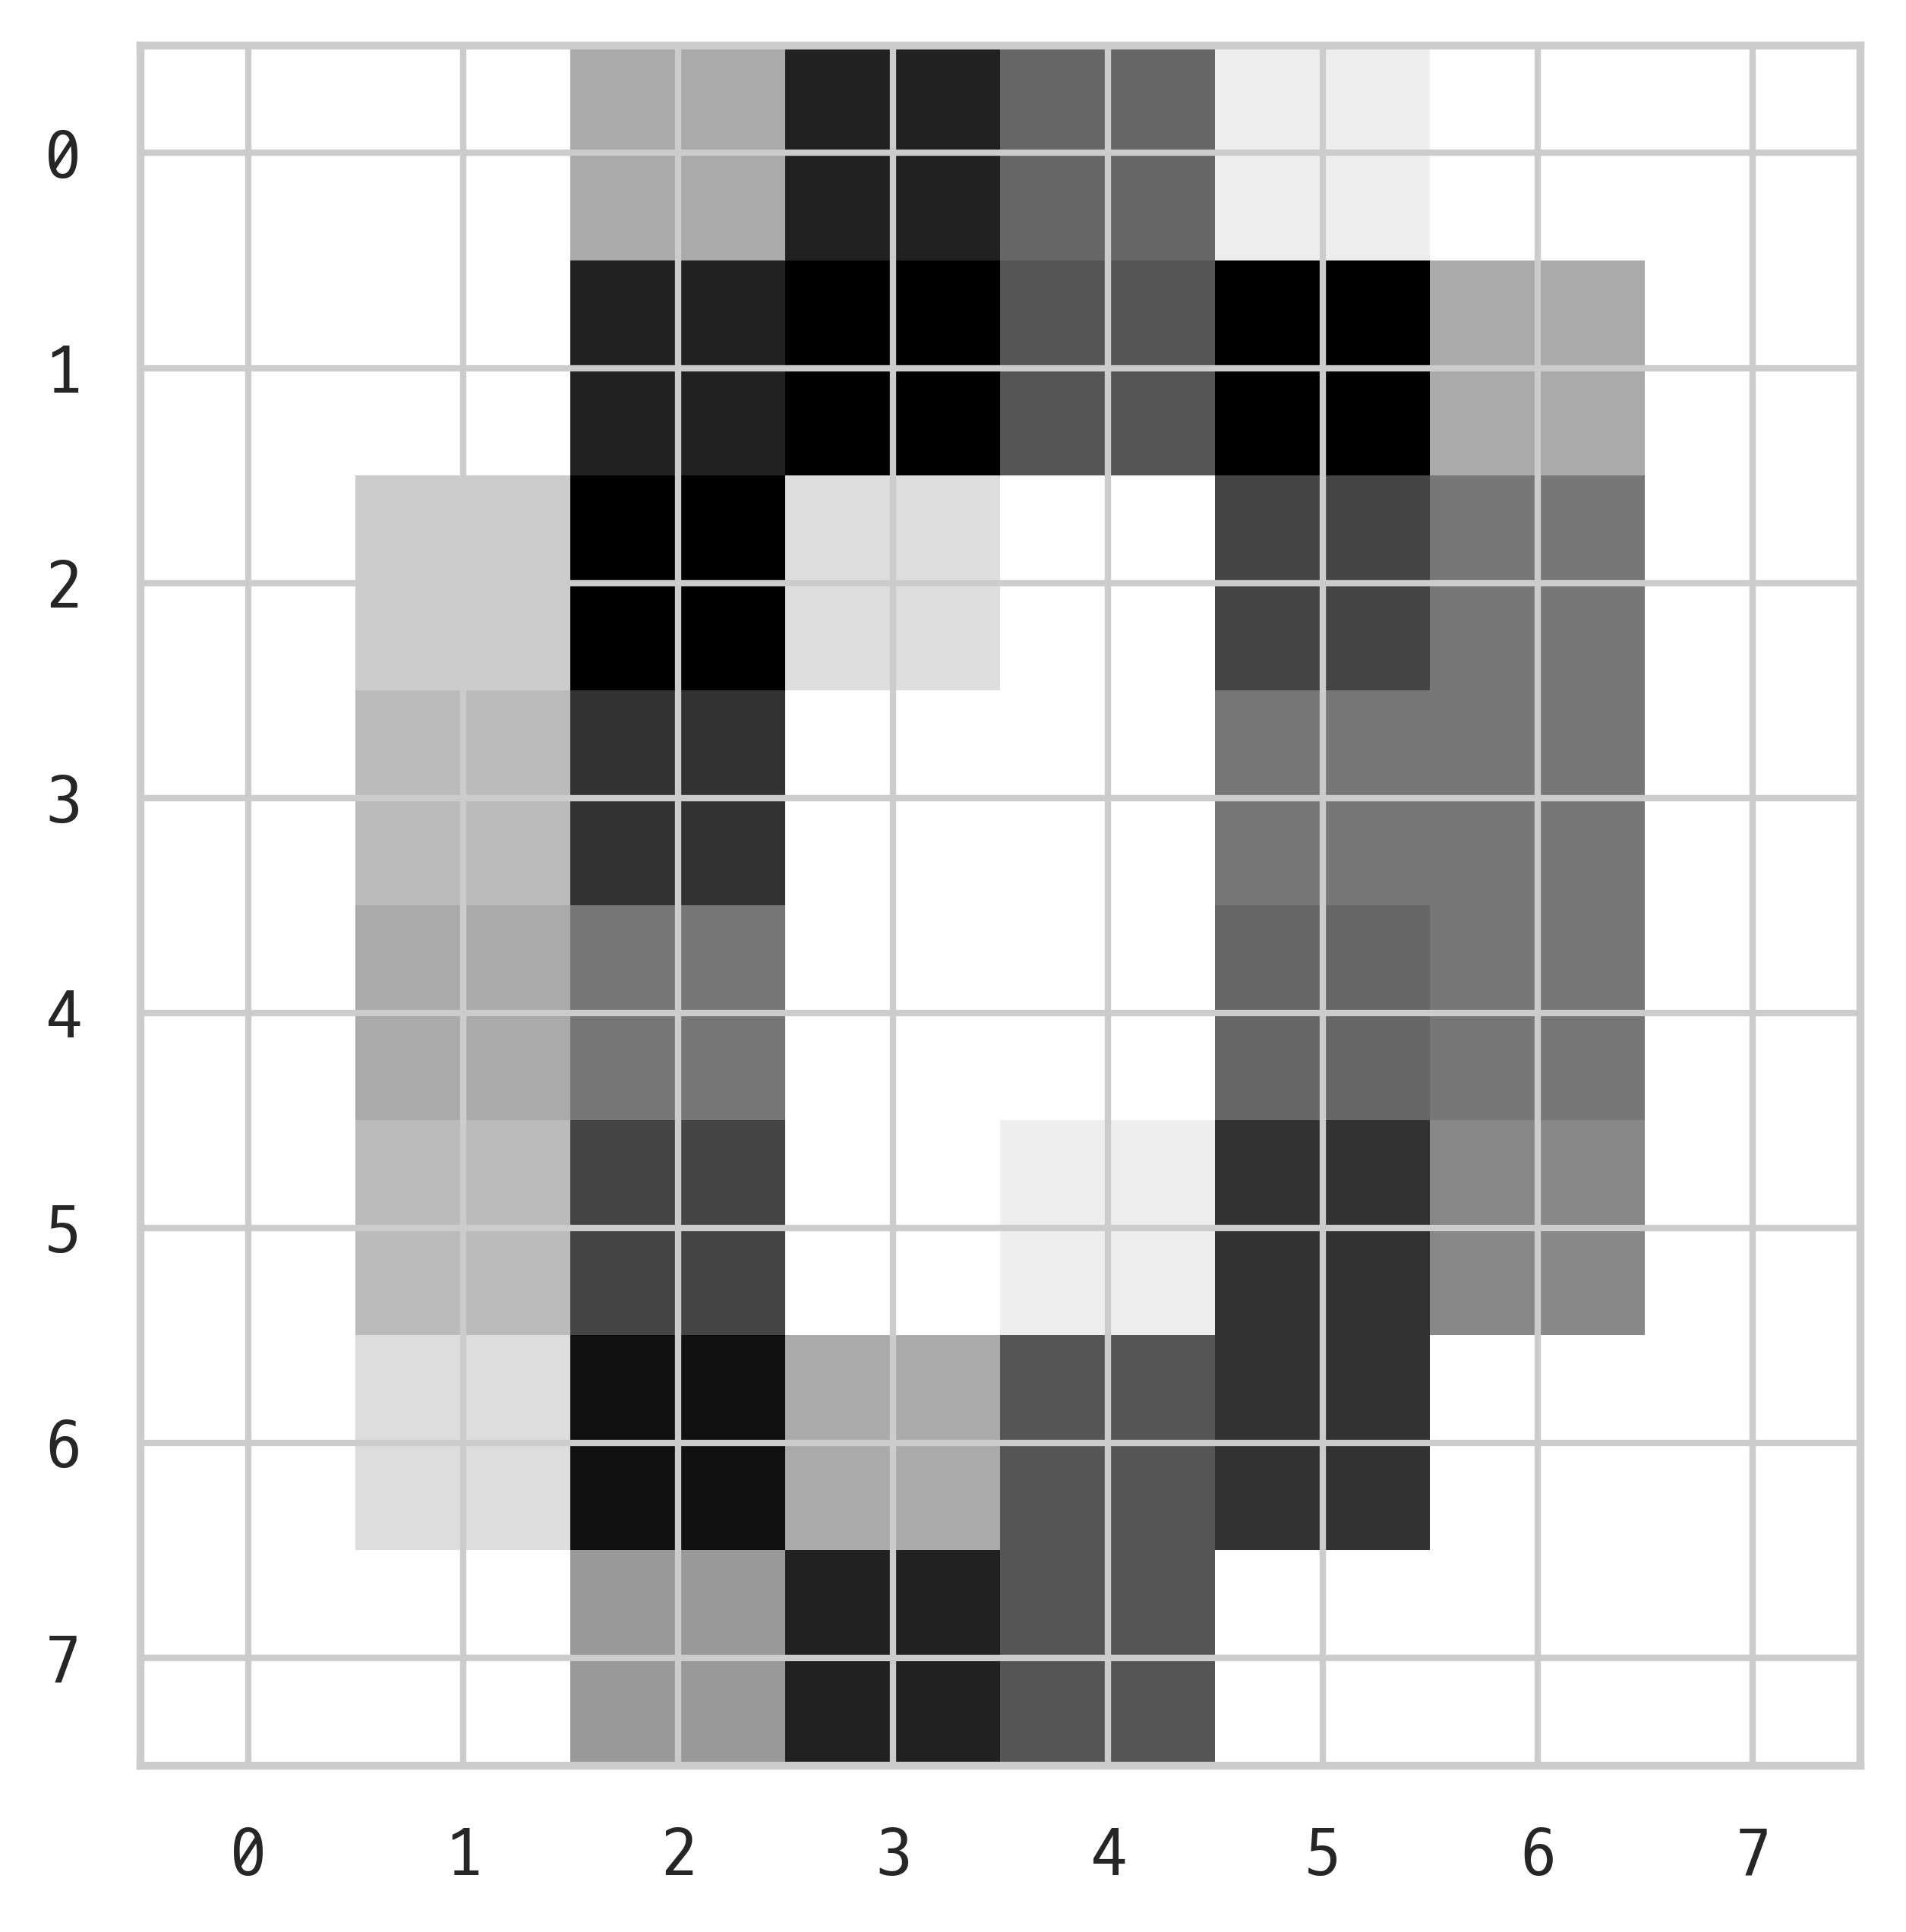

In [133]:
digits = load_digits()
X1 = digits.data
y1 = digits.target

plt.imshow(X1[0].reshape((8, 8)), cmap=plt.cm.binary)

In [134]:
model1 = BernoulliNB(binarize=7).fit(X1, y1)
y_pred1 = model1.predict(X1)

print(classification_report(y1, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



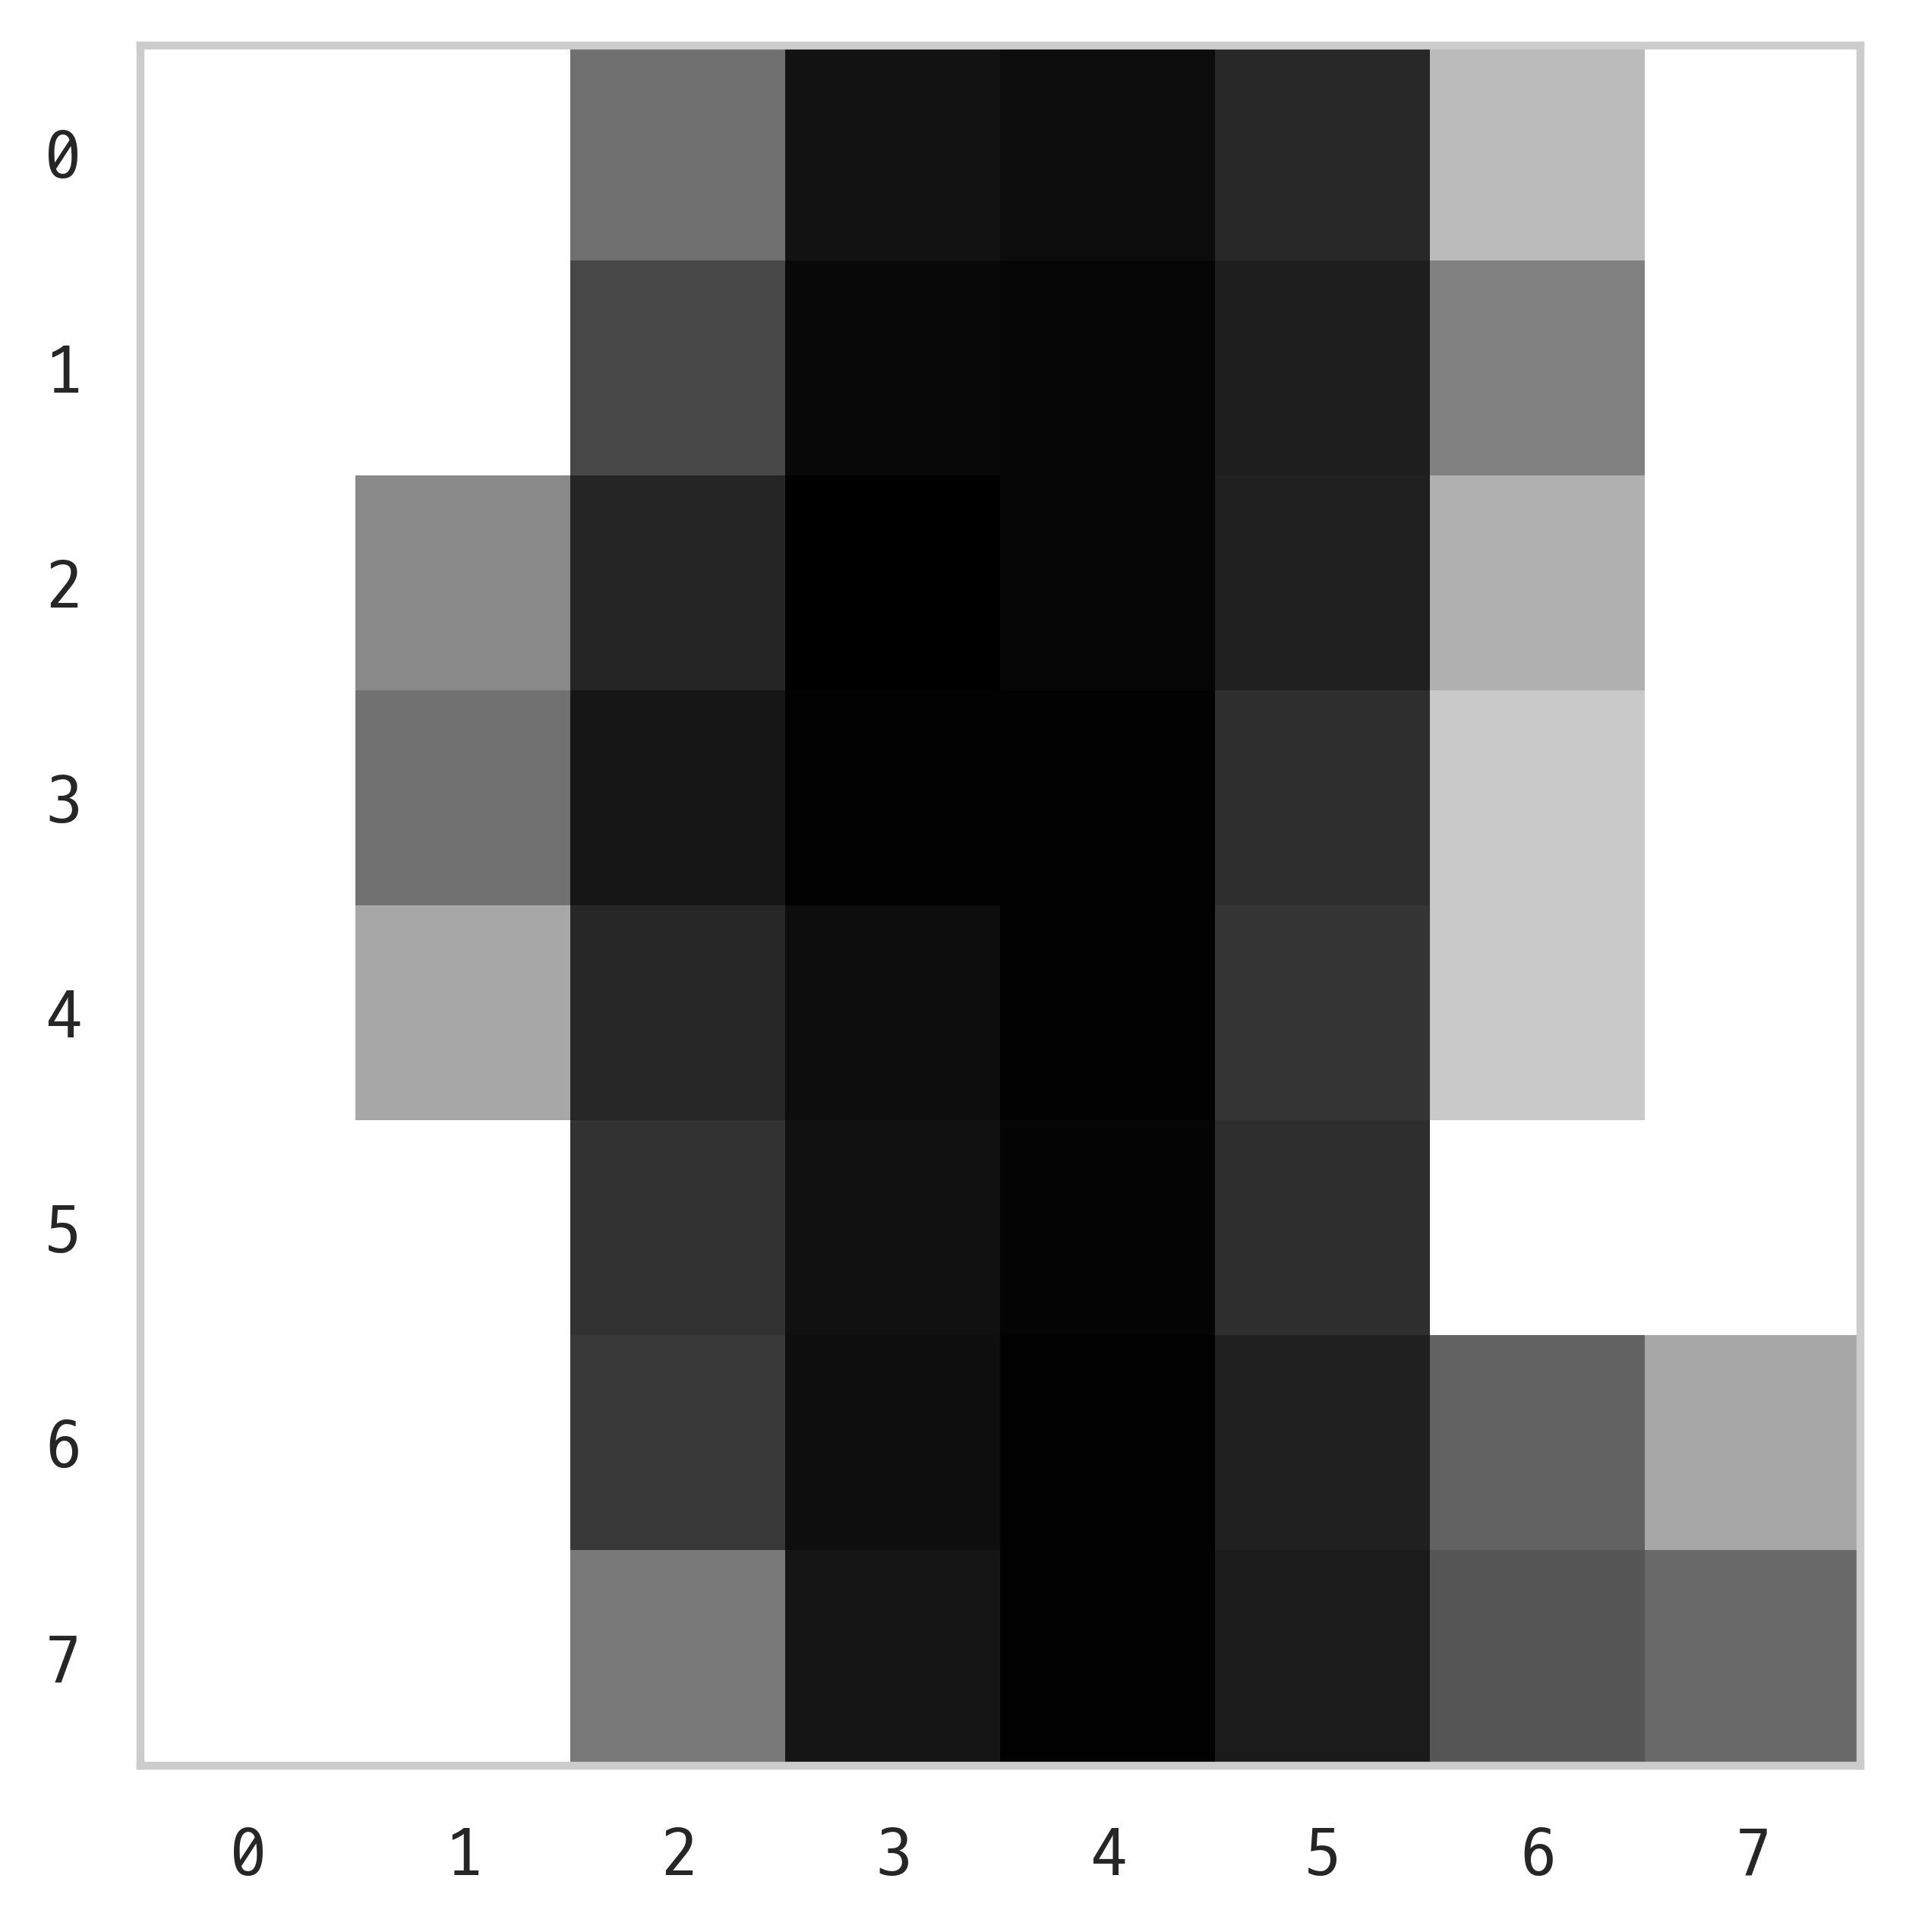

In [138]:
plt.imshow(model.feature_log_prob_[1].reshape((8, 8)), cmap=plt.cm.binary)
plt.grid(False)
plt.show()

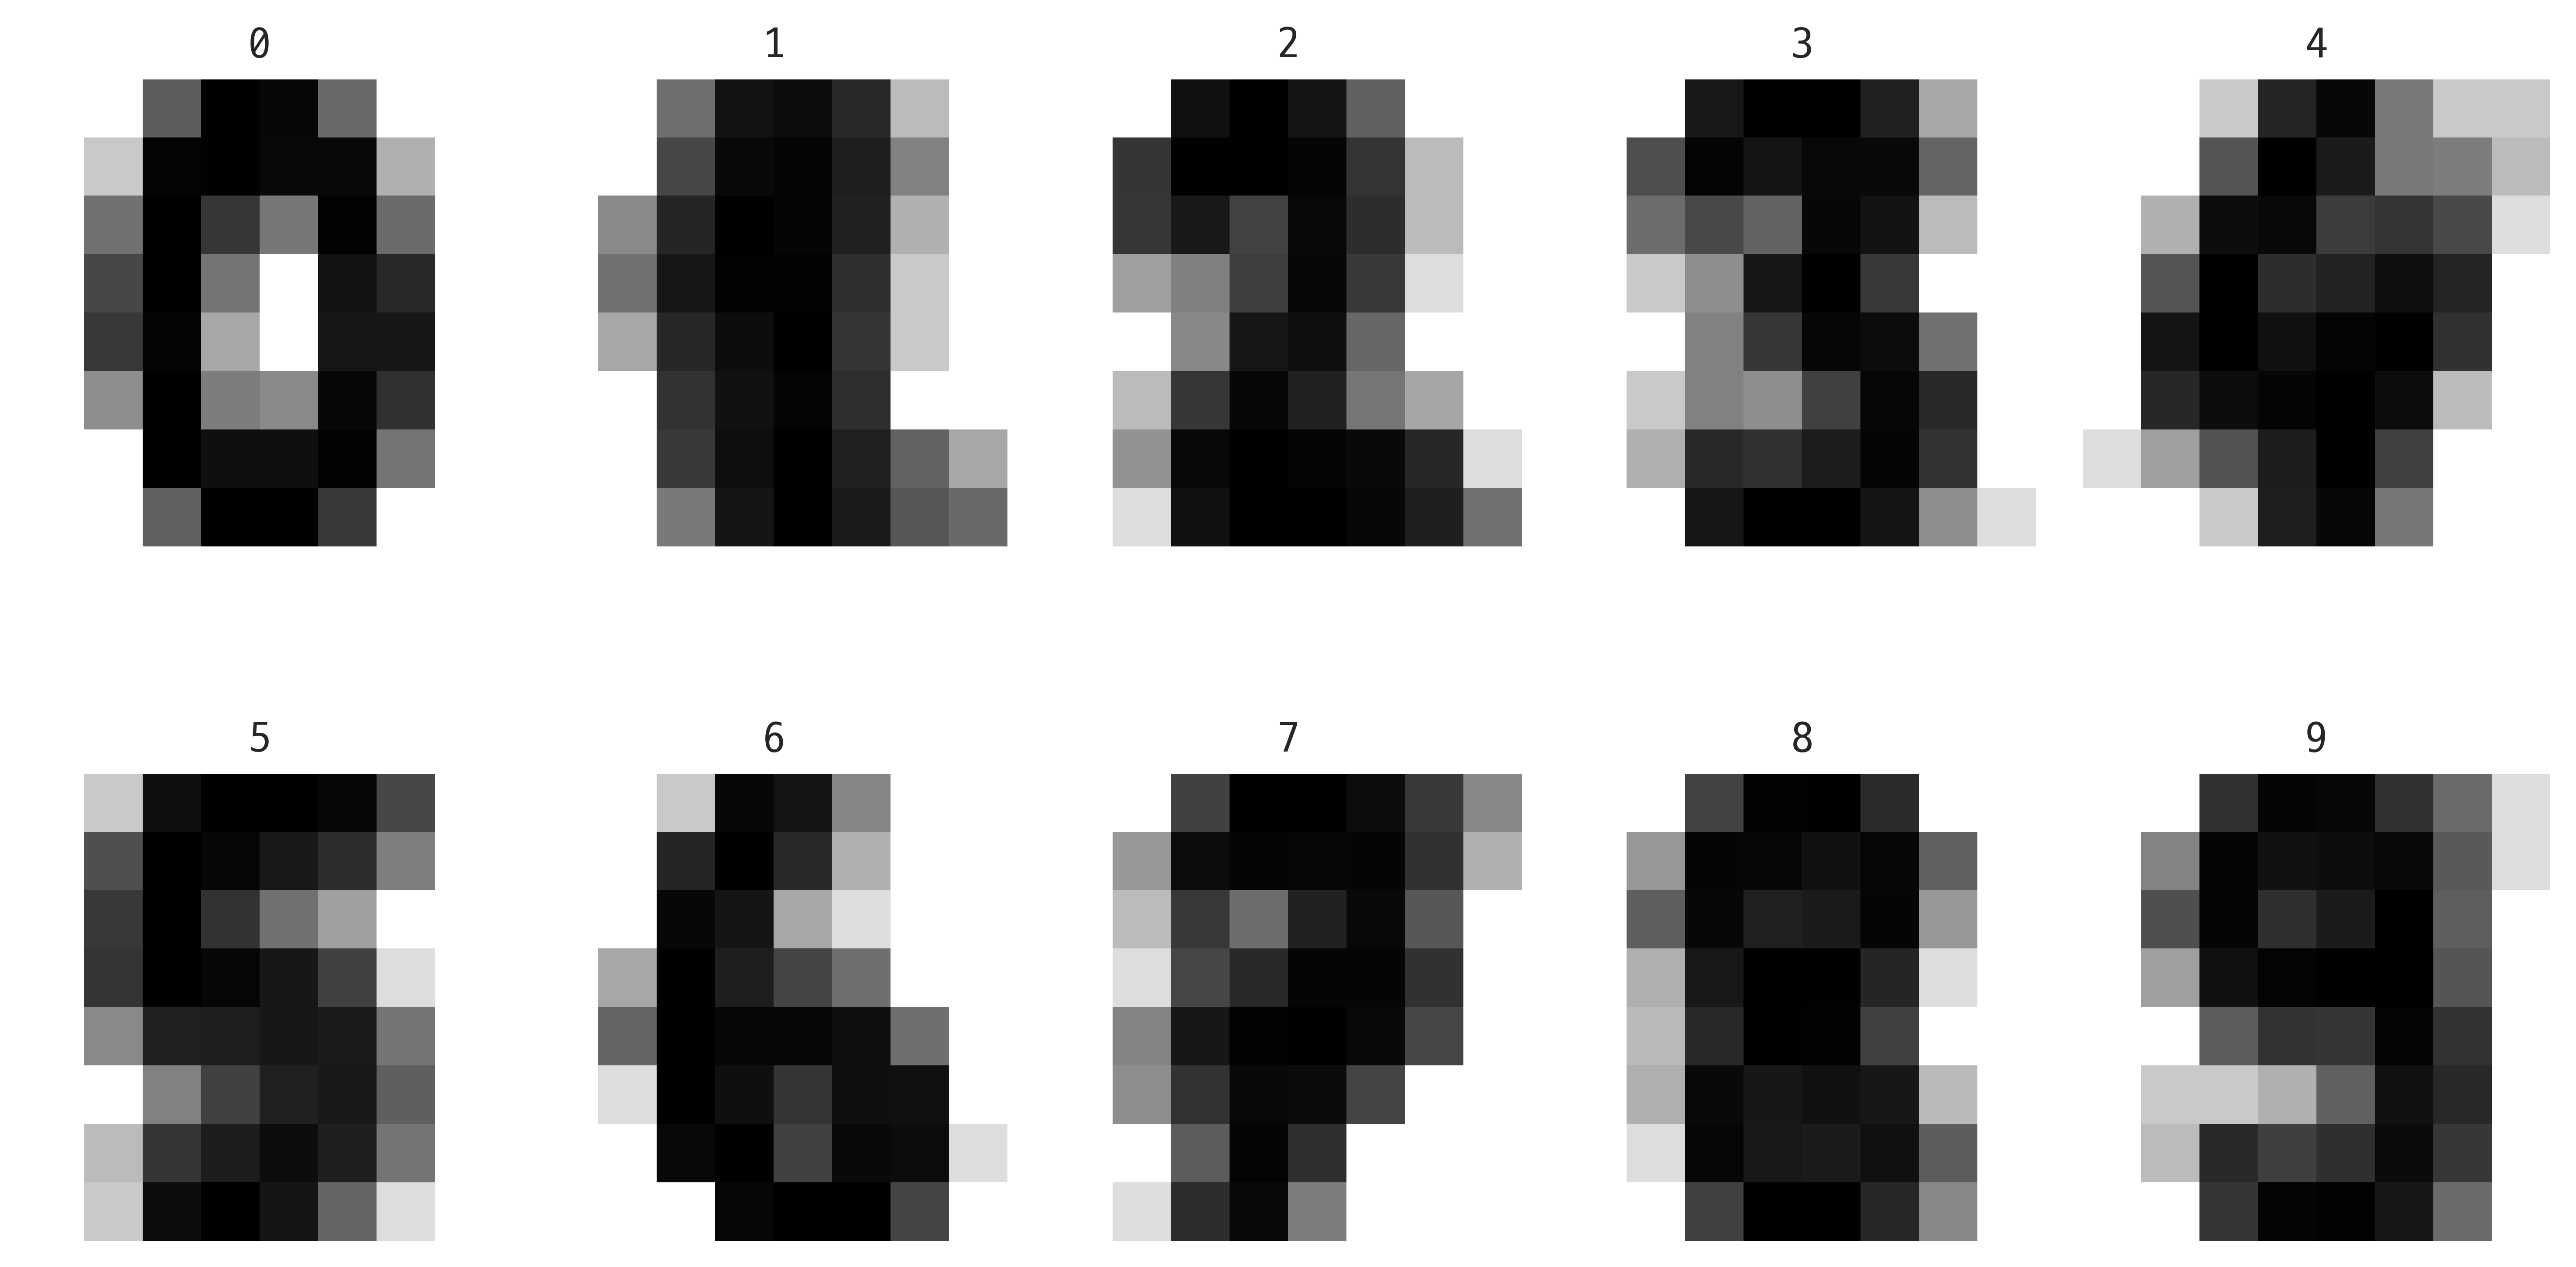

In [146]:
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(model.feature_log_prob_[i].reshape((8, 8)), cmap=plt.cm.binary)
    plt.title(i)
    plt.grid(False)
    plt.axis(False)
plt.tight_layout()
plt.show()

#### 다항분포 나이브베이즈 모형

In [147]:
X = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [149]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [150]:
model_mult.classes_

array([0, 1])

In [151]:
model_mult.class_count_

array([4., 6.])

In [153]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

In [154]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

In [155]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

In [156]:
model_mult.alpha

1.0

In [159]:
# 스무딩 적용
(fc + model_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [160]:
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [162]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

array([[0.38848858, 0.61151142]])

In [163]:
p = (theta ** x_new).prod(axis=1) * np.exp(model_mult.class_log_prior_)
p / p.sum()

array([0.38848858, 0.61151142])

#### Ex. 13.2.3

In [164]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

model = MultinomialNB().fit(X, y)
y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.91      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.91      0.91      1797



#### Ex. 13.2.4

In [167]:
X = X / 10 * 9
X

array([[ 0.  ,  0.  ,  4.05, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  8.1 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., 12.96,  7.29,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.81, ...,  4.86,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.62, ...,  9.72,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  8.1 , ...,  9.72,  0.81,  0.  ]])

In [168]:
model = MultinomialNB().fit(X, y)
y_pred = model.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       178
           1       0.87      0.75      0.81       182
           2       0.90      0.90      0.90       177
           3       0.99      0.87      0.93       183
           4       0.96      0.96      0.96       181
           5       0.97      0.86      0.91       182
           6       0.98      0.97      0.98       181
           7       0.89      0.99      0.94       179
           8       0.78      0.89      0.83       174
           9       0.76      0.88      0.82       180

    accuracy                           0.90      1797
   macro avg       0.91      0.91      0.91      1797
weighted avg       0.91      0.90      0.91      1797



In [ ]:
"""위에서 나온 대로 정수가 아니여도 (즉, TF-IDF를 적용해도) 사용 가능하다. 
왜냐하면 feature_count_에서 실제로는 counting을 한 것이 아니라 np.sum()을 썼기 때문이다.
또한 값도 비슷하게 나오는 것을 확인할 수 있다.
따라서 현실에서는 실수로 되어있는 값이든 0, 1로 되어있는 값이든 정수로 되어있는 값이든
GaussianNB, BernoulliNB, MultinomialNB 어디에 입력해도 비슷한 결과가 도출된다.
"""

#### 뉴스그룹 분류

In [2]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset='all')
X = news.data
y = news.target

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
    ('vect', CountVectorizer()),
    ('model', MultinomialNB()),
])
model2 = Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', MultinomialNB()),
])
model3 = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('model', MultinomialNB()),
])
model4 = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english', token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
    ('model', MultinomialNB()),
])

ImportError: DLL load failed: 지정된 프로시저를 찾을 수 없습니다.

In [171]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(('Model{0:d}: Mean score: {1:.3f}').format(i + 1, np.mean(scores)))

Model1: Mean score: 0.855
Model2: Mean score: 0.856
Model3: Mean score: 0.883
Model4: Mean score: 0.888
Wall time: 2min 24s


#### Ex. 13.2.5

In [172]:
# 1 : 변수를 나눠서 각각 적합한 나이브베이즈 클래스를 사용하여 풀면 된다. 

In [173]:
# 2 : 연속확률분포 특징과 베르누이확률분포 특징이 섞여있는 covtype 분류문제 풀기
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()
X = covtype.data
y = covtype.target
X1 = X[:, :10]
X2 = X[:, 10:]
X1[0], X2[0]

(array([2.596e+03, 5.100e+01, 3.000e+00, 2.580e+02, 0.000e+00, 5.100e+02,
        2.210e+02, 2.320e+02, 1.480e+02, 6.279e+03]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [175]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

model1 = GaussianNB().fit(X1, y)
model2 = BernoulliNB().fit(X2, y)

prob1 = model1.predict_proba(X1)
prob2 = model2.predict_proba(X2)

likeli1 = prob1 / model1.class_prior_
likeli2 = prob2 / model1.class_prior_
prob = likeli1 * likeli2 * model1.class_prior_
y_pred = np.argmax(prob, axis=1) + 1

In [176]:
confusion_matrix(y, y_pred)

array([[140348,  53648,    157,      0,   2071,    881,  14735],
       [ 65031, 188638,   5849,     19,  12541,   7752,   3471],
       [     0,   2307,  23675,   3094,   1319,   5359,      0],
       [     0,      0,    551,   1941,      0,    255,      0],
       [   245,   5134,    275,      0,   3513,    326,      0],
       [     0,   1910,   6230,    621,    464,   8142,      0],
       [  6371,    183,      0,      0,     22,      0,  13934]],
      dtype=int64)

In [177]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66    211840
           2       0.75      0.67      0.71    283301
           3       0.64      0.66      0.65     35754
           4       0.34      0.71      0.46      2747
           5       0.18      0.37      0.24      9493
           6       0.36      0.47      0.41     17367
           7       0.43      0.68      0.53     20510

    accuracy                           0.65    581012
   macro avg       0.48      0.60      0.52    581012
weighted avg       0.68      0.65      0.66    581012



In [179]:
model = BernoulliNB().fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.48      0.55    211840
           2       0.65      0.76      0.70    283301
           3       0.60      0.87      0.71     35754
           4       0.55      0.43      0.48      2747
           5       0.22      0.06      0.10      9493
           6       0.24      0.23      0.23     17367
           7       0.63      0.61      0.62     20510

    accuracy                           0.63    581012
   macro avg       0.51      0.49      0.49    581012
weighted avg       0.63      0.63      0.62    581012

